<a href="https://colab.research.google.com/github/fillerInk/handson-ml-with-scikitlearn-and-tensorflow/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [3]:
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [0]:
x,y = mnist["data"],mnist["target"]

In [5]:
x.shape

(70000, 784)

In [6]:
y.shape

(70000,)

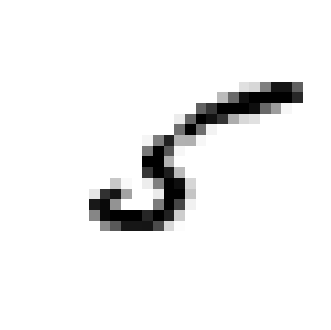

In [20]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = x[11]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap= matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [8]:
y[23001]

'2'

In [0]:
x_train, x_test, y_train, y_test = x[:60000],x[60000:],y[:60000],y[60000:]
 
import numpy as np

shuffle_index = np.random.permutation(60000)
x_train,y_train = x_train[shuffle_index],y_train[shuffle_index]

In [0]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')




In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
sgd_clf.predict([some_digit])

array([ True])

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train,y_train_5,cv=3,scoring="accuracy")

array([0.963  , 0.9627 , 0.93125])

In [0]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,x_train,y_train_5,cv=3)

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[52926,  1653],
       [ 1208,  4213]])

In [32]:
from sklearn.metrics import precision_score,recall_score,f1_score
print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5,y_train_pred))
print(f1_score(y_train_5,y_train_pred))

0.7182066143879986
0.7771628850765542
0.7465225480641445


In [33]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([15034.56389945])

In [0]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [35]:
print(y_some_digit_pred)

[ True]


In [0]:
y_scores = cross_val_predict(sgd_clf,x_train,y_train_5,cv=3,method="decision_function")

In [0]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
  plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
  plt.plot(thresholds,recalls[:-1],"g--",label="Recall")
  plt.xlabel("Threshold")
  plt.legend(loc="upper_left")
  plt.ylim([0,1])

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "upper_left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


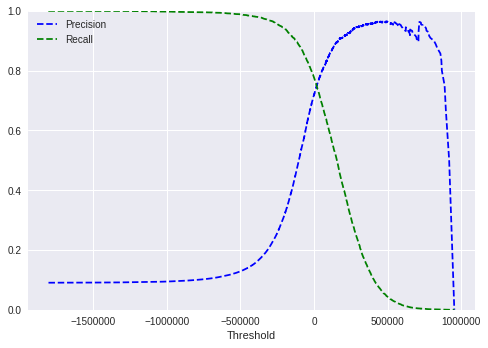

In [41]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [0]:
y_train_pred_90 = (y_scores > 70000)

In [44]:
precision_score(y_train_5,y_train_pred_90)

0.8151452756806222

In [45]:
recall_score(y_train_5,y_train_pred_90)

0.657258808337945